In [1]:
import numpy as np
import json
import ast
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams["figure.titleweight"] = 'bold'
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

ALMOST_BLACK = '0.125'
plt.rcParams['text.color'] = ALMOST_BLACK
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['xtick.major.pad'] = '8'
plt.rcParams['axes.edgecolor']  = ALMOST_BLACK
plt.rcParams['axes.labelcolor'] = ALMOST_BLACK
plt.rcParams['lines.color']     = ALMOST_BLACK
plt.rcParams['xtick.color']     = ALMOST_BLACK
plt.rcParams['ytick.color']     = ALMOST_BLACK
plt.rcParams['text.color']      = ALMOST_BLACK
from math import ceil,floor
from representations.sequentialembedding import SequentialEmbedding


In [3]:
import coha

In [2]:
import requests
url = "https://books.google.com/ngrams/json"

query_params = {
        "content": "eugenics",
        "year_start": 1800,
        "year_end": 2019,
        "corpus": 26,
        "smoothing": 10,
        "case_insensitive": True
    }
response = requests.get(url=url, params=query_params)
out = ast.literal_eval(json.dumps(response.json()))[0]

In [57]:
len(out['timeseries'])

220

In [45]:
?plt.axvline

Signature: plt.axvline(x=0, ymin=0, ymax=1, hold=None, **kwargs)
Docstring:
Add a vertical line across the axes.

Parameters
----------
x : scalar, optional, default: 0
    x position in data coordinates of the vertical line.

ymin : scalar, optional, default: 0
    Should be between 0 and 1, 0 being the bottom of the plot, 1 the
    top of the plot.

ymax : scalar, optional, default: 1
    Should be between 0 and 1, 0 being the bottom of the plot, 1 the
    top of the plot.

Returns
-------
line : :class:`~matplotlib.lines.Line2D`

Other Parameters
----------------
**kwargs :
    Valid kwargs are :class:`~matplotlib.lines.Line2D` properties,
    with the exception of 'transform':

      agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: bool 
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `

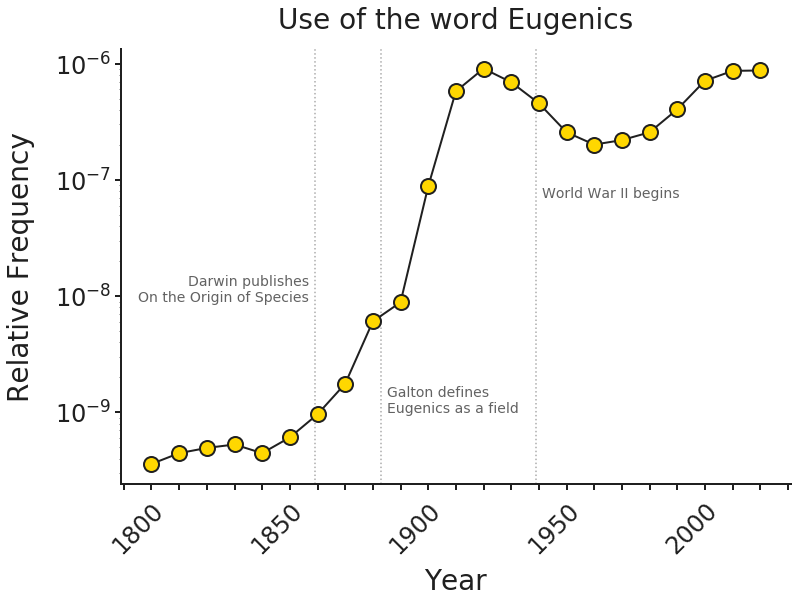

In [93]:
def plotNgramFrequency(word,year_0,year_n):
    
    url = "https://books.google.com/ngrams/json"

    query_params = {
        "content": word,
        "year_start": year_0,
        "year_end": year_n,
        "corpus": 26,
        "smoothing": 10,
        "case_insensitive": True
    }
    response = requests.get(url=url, params=query_params)


    fig, ax = plt.subplots(figsize=(12,8))

    a = range(year_0,year_n+1,10)
    out = ast.literal_eval(json.dumps(response.json()))[0]#['timeseries']
    b = [out['timeseries'][i] for i in range(len(out['timeseries'])) if i%10==0]
    

    plt.plot(a, b, mfc='gold', mec='0.125',marker='o', ms=15, ls='-', color='0.125', lw=2,mew=2)
    #plt.scatter(a, b,c='b',s=500,alpha=.99)
    thicc = 2
    ax.set_ylabel("Relative Frequency",fontsize=28,labelpad = 20)
    ax.set_xlabel("Year",fontsize=28,labelpad = 10)
    ax.set_xticks(range(year_0,year_n+1,50))
    ax.set_xticklabels(range(year_0,year_n+1,50),rotation=45,rotation_mode='anchor',ha='right')
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax.xaxis.set_minor_locator(MultipleLocator(10))  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(bottom=True, left=True)
#    y_min = floor(min(time_sims.values()*10))/10
 #   y_max = ceil(max(time_sims.values())*10)/10 + 0.01
 #   ax.set_ylim((y_min,y_max))
  #  ax.set_yticks(map(lambda x: x/100.0, range(int(y_min*100),int(y_max*100),10)))

    ax.xaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.yaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.xaxis.set_tick_params(width=thicc,which='minor',length=thicc*3)
    plt.axvline(x=1859,zorder=1,color="0.525",linestyle='dotted',alpha=0.7)
    plt.annotate("Darwin publishes\nOn the Origin of Species",xy=(1857,0.000000009),fontsize=14,ha='right',alpha=0.7)

    plt.axvline(x=1883,zorder=1,color="0.525",linestyle='dotted',alpha=0.7)
    plt.annotate("Galton defines\nEugenics as a field",xy=(1885,0.000000001),fontsize=14,ha='left',alpha=0.7)
    
    plt.axvline(1939,zorder=1,color="0.525",linestyle='dotted',alpha=0.7)
    plt.annotate("World War II begins",xy=(1941,0.00000007),fontsize=14,ha='left',alpha=0.7)
    
    #plt.ylim((10**-10,10**-5))
    plt.yticks(fontsize=24)

    plt.xticks(fontsize=24)
    plt.yscale('log')

    #plt.yticks()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(thicc)
    plt.title("Use of the word " + str(word).title(),fontsize=28,pad=20)

    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)  
    plt.savefig('eugenics_relative_frequency.png',bbox_inches='tight',dpi=300)
    return plt.show()

plotNgramFrequency('eugenics',1800,2020)


In [26]:
for key in response.json():
    print(key,":", response.json()[key]) 


(u'ngrams', ':', [{u'tokens': [{u'text': u'eugenics', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 981634, u'id': u'4aec9d4dc36ac14289b37e4dd0e708dd', u'relTotalMatchCount': 4.914274583938805e-07}, {u'tokens': [{u'text': u'Eugenics', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 762671, u'id': u'a10205f7a1316d1daafe0971a834bdb6', u'relTotalMatchCount': 3.8180978971869277e-07}, {u'tokens': [{u'text': u'EUGENICS', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 45997, u'id': u'5c923ddd6a9dedbd8fe97214e9267f0f', u'relTotalMatchCount': 2.3027104606954652e-08}, {u'tokens': [{u'text': u'EUGENICs', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 1559, u'id': u'2c96391fddf14519dffe775c3e1a989b', u'relTotalMatchCount': 7.804695106690068e-10}, {u'tokens': [{u'text': u'EUGENics', u'kind': u'TERM', u'type': u'TERM'}], u'absTotalMatchCount': 1277, u'id': u'3b82abf98f067aff6bf790bbe021e73b', u'relTotalMatchCount': 6.392941405544077e-10}, {u'to

In [29]:
response.json()[u'ngrams']

[{u'absTotalMatchCount': 981634,
  u'id': u'4aec9d4dc36ac14289b37e4dd0e708dd',
  u'relTotalMatchCount': 4.914274583938805e-07,
  u'tokens': [{u'kind': u'TERM', u'text': u'eugenics', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 762671,
  u'id': u'a10205f7a1316d1daafe0971a834bdb6',
  u'relTotalMatchCount': 3.8180978971869277e-07,
  u'tokens': [{u'kind': u'TERM', u'text': u'Eugenics', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 45997,
  u'id': u'5c923ddd6a9dedbd8fe97214e9267f0f',
  u'relTotalMatchCount': 2.3027104606954652e-08,
  u'tokens': [{u'kind': u'TERM', u'text': u'EUGENICS', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 1559,
  u'id': u'2c96391fddf14519dffe775c3e1a989b',
  u'relTotalMatchCount': 7.804695106690068e-10,
  u'tokens': [{u'kind': u'TERM', u'text': u'EUGENICs', u'type': u'TERM'}]},
 {u'absTotalMatchCount': 1277,
  u'id': u'3b82abf98f067aff6bf790bbe021e73b',
  u'relTotalMatchCount': 6.392941405544077e-10,
  u'tokens': [{u'kind': u'TERM', u'text': u'EUGENics', u'type': 

In [28]:
response.json().keys()

[u'ngrams', u'queryTokens']

In [3]:
embeddings_all = SequentialEmbedding.load("embeddings/eng-all_sgns", range(1800, 2000, 10))
embeddings_coha = SequentialEmbedding.load("embeddings/coha-word", range(1800, 2000, 10))


/opt/anaconda3/envs/histwords-env/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


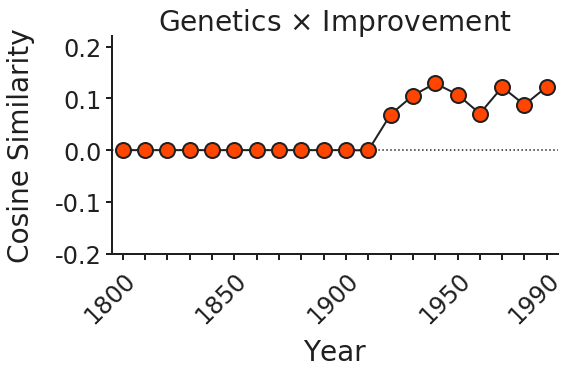

In [4]:
def plotDiachronicSimilarity(word1,word2,embeddings,color):
    time_sims = embeddings.get_time_sims(word1, word2) 


    fig, ax = plt.subplots(figsize=(8,4))

    a = list(time_sims.keys())
    b = list(time_sims.values())

    plt.plot(a, b, mfc=color, mec='0.125',marker='o', ms=15, ls='-', color='0.125', lw=2,mew=2)
    #plt.scatter(a, b,c='b',s=500,alpha=.99)
    thicc = 2
    ax.set_ylabel("Cosine Similarity",fontsize=28,labelpad = 20)
    ax.set_xlabel("Year",fontsize=28,labelpad = 10)
    ax.set_xticks([1800,1850,1900,1950,1990])
    ax.set_xticklabels([1800,1850,1900,1950,1990],rotation=45,rotation_mode='anchor',ha='right')
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax.xaxis.set_minor_locator(MultipleLocator(10))  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(bottom=True, left=True)
    ax.set_xlim((1795,1995))
    y_min = floor(min(time_sims.values()*10))/10 - 0.1
    y_max = ceil(max(time_sims.values())*10)/10 + 0.02
    ax.set_ylim((y_min,y_max))
    ax.set_yticks(map(lambda x: x/100.0, range(int(y_min*100),int(y_max*100),10)))

    ax.xaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.yaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.xaxis.set_tick_params(width=thicc,which='minor',length=thicc*3)
    plt.axhline(0,zorder=1,color="0.125",linestyle='dotted')
    plt.yticks(fontsize=24)

    plt.xticks(fontsize=24)

    #plt.yticks()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(thicc)
    plt.title(str(word1).title() + " $\\times$ " + str(word2).title(),fontsize=28)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)  
    #plt.savefig(word1 + "_" + word2 + "_coevolution",bbox_inches='tight',dpi=300,)
    return plt.show()

plotDiachronicSimilarity('genetics','improvement',embeddings_all,'orangered')

In [14]:
[(int(i) - 1880)/ 10 for i in range(1880, 2000, 10)] 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

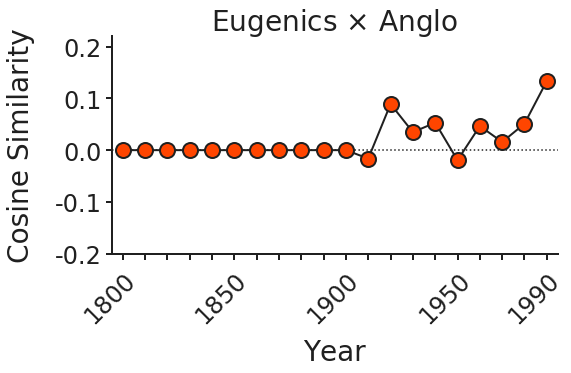

In [10]:
plotDiachronicSimilarity('eugenics','anglo',embeddings_all,'orangered')

asiatic, anglo*, negro,negroid, oriental

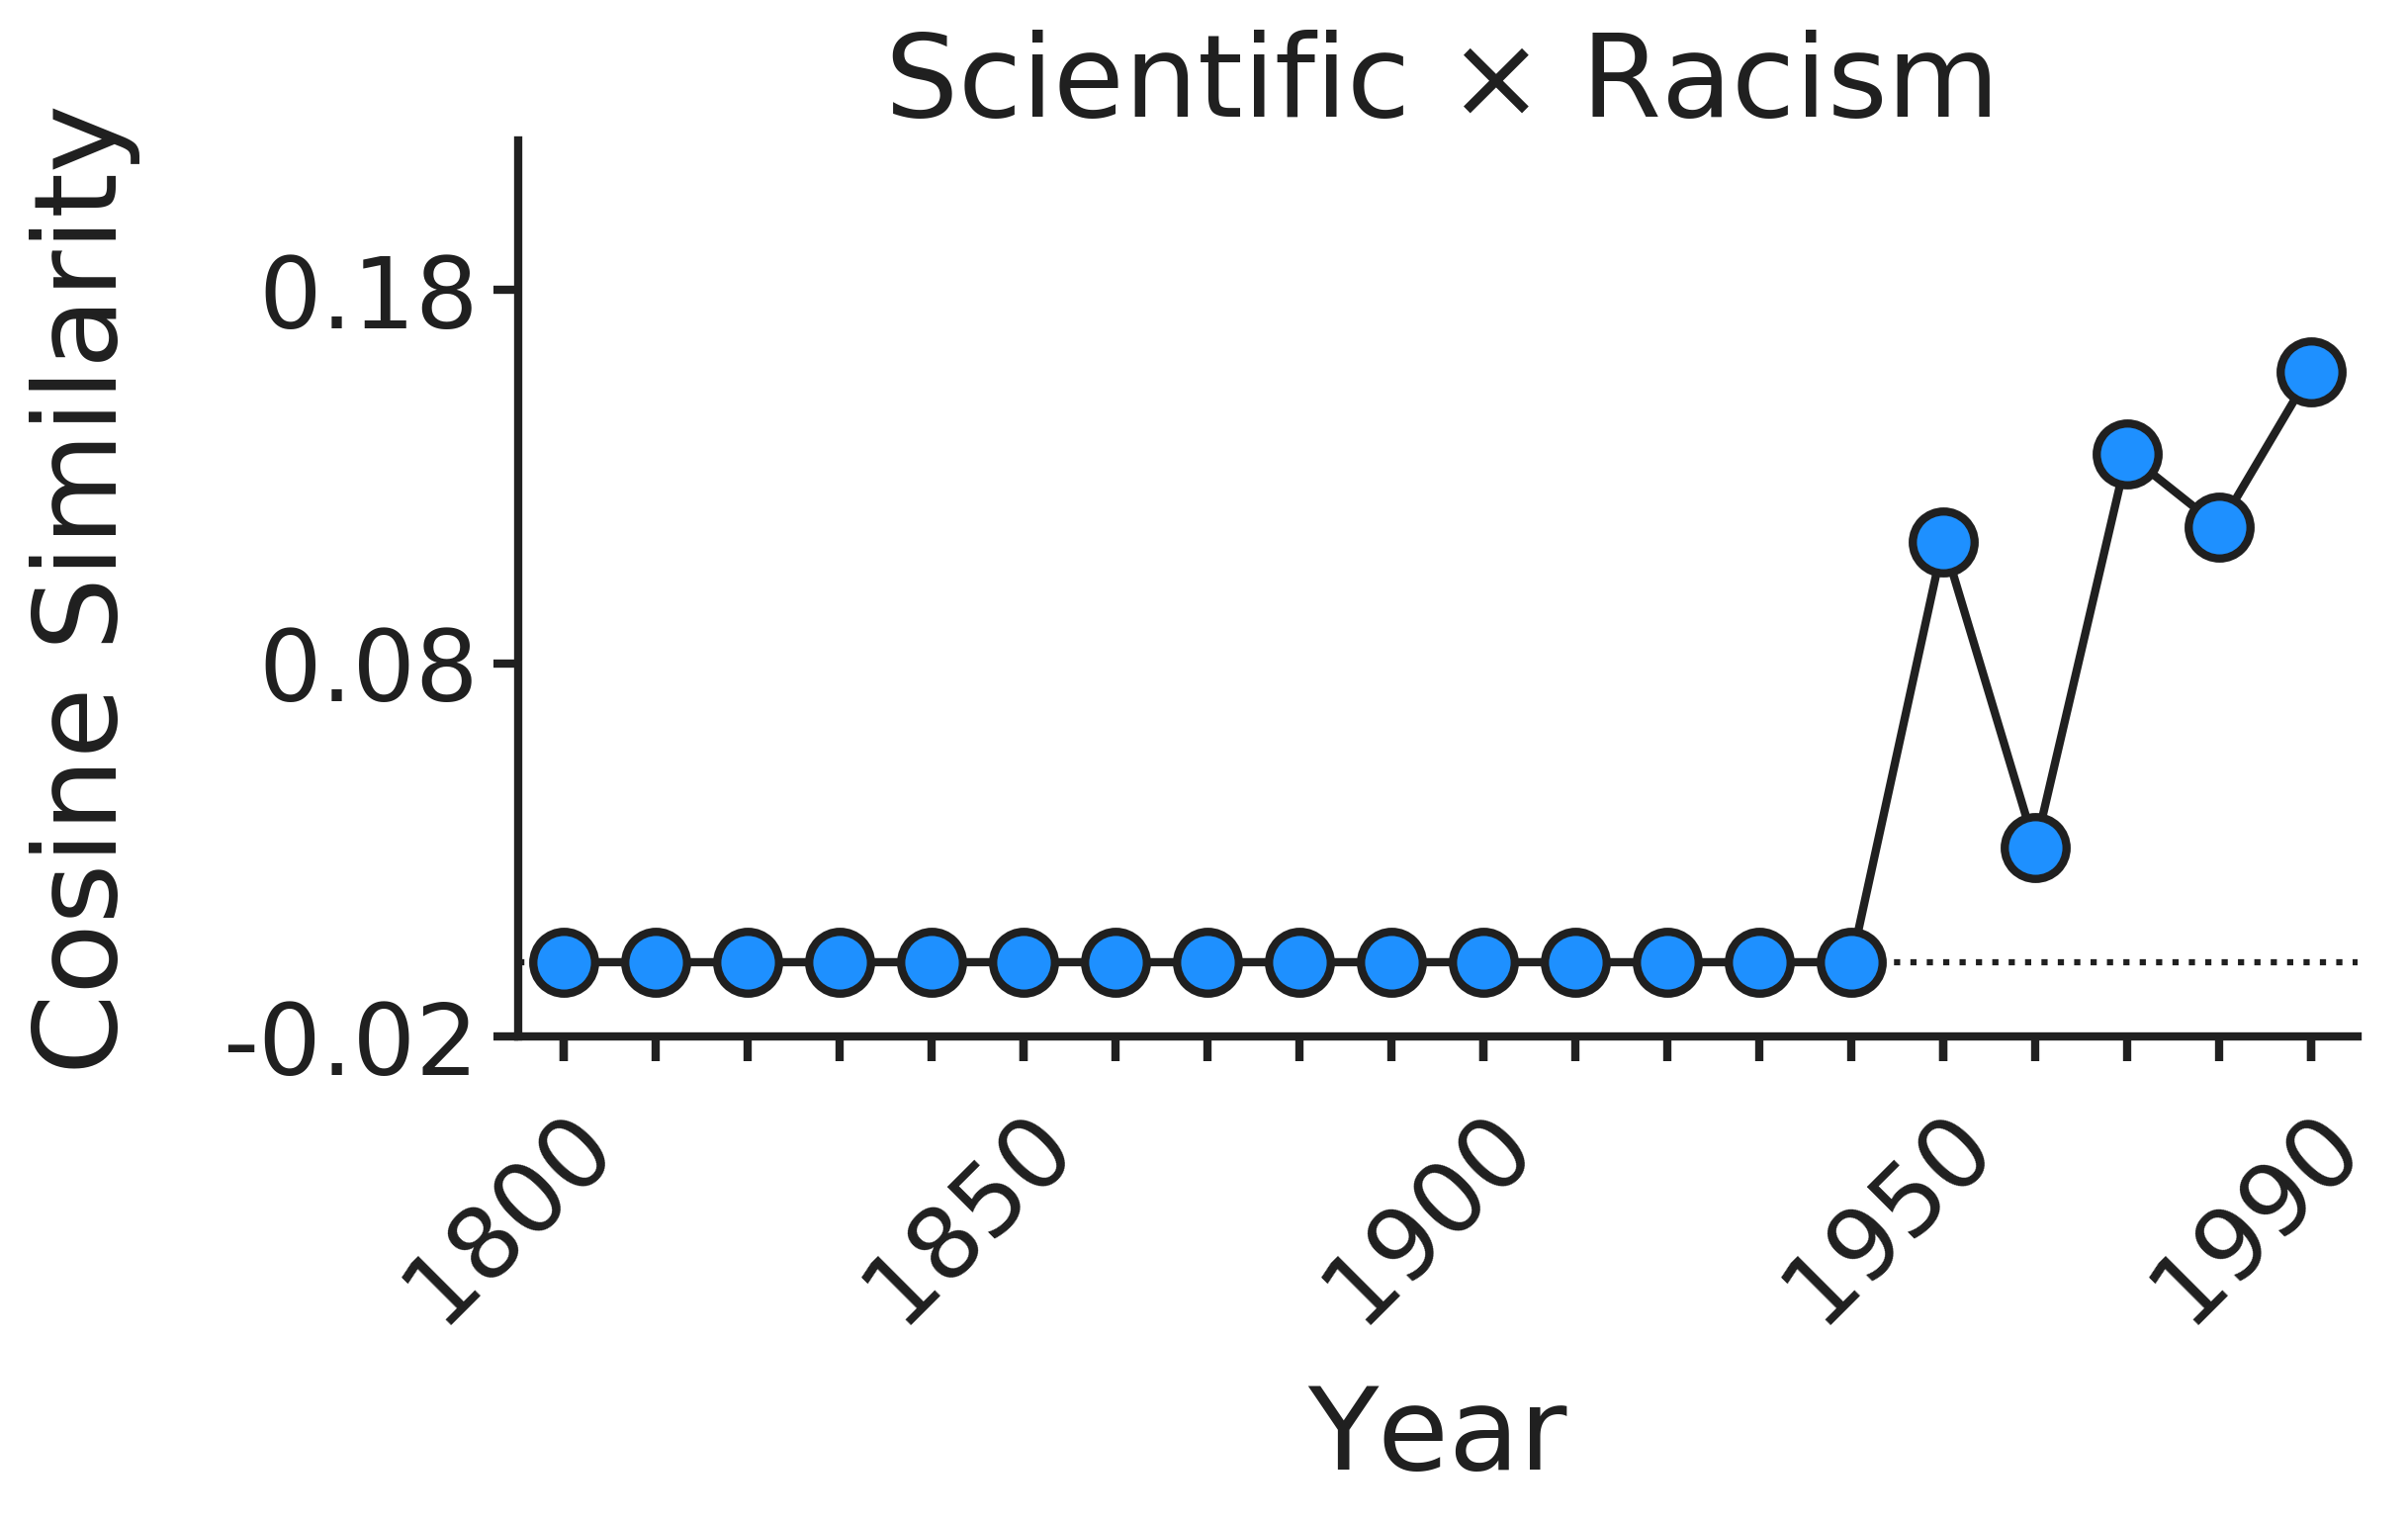

In [116]:
plotDiachronicSimilarity('scientific','racism',embeddings_all,'dodgerblue')

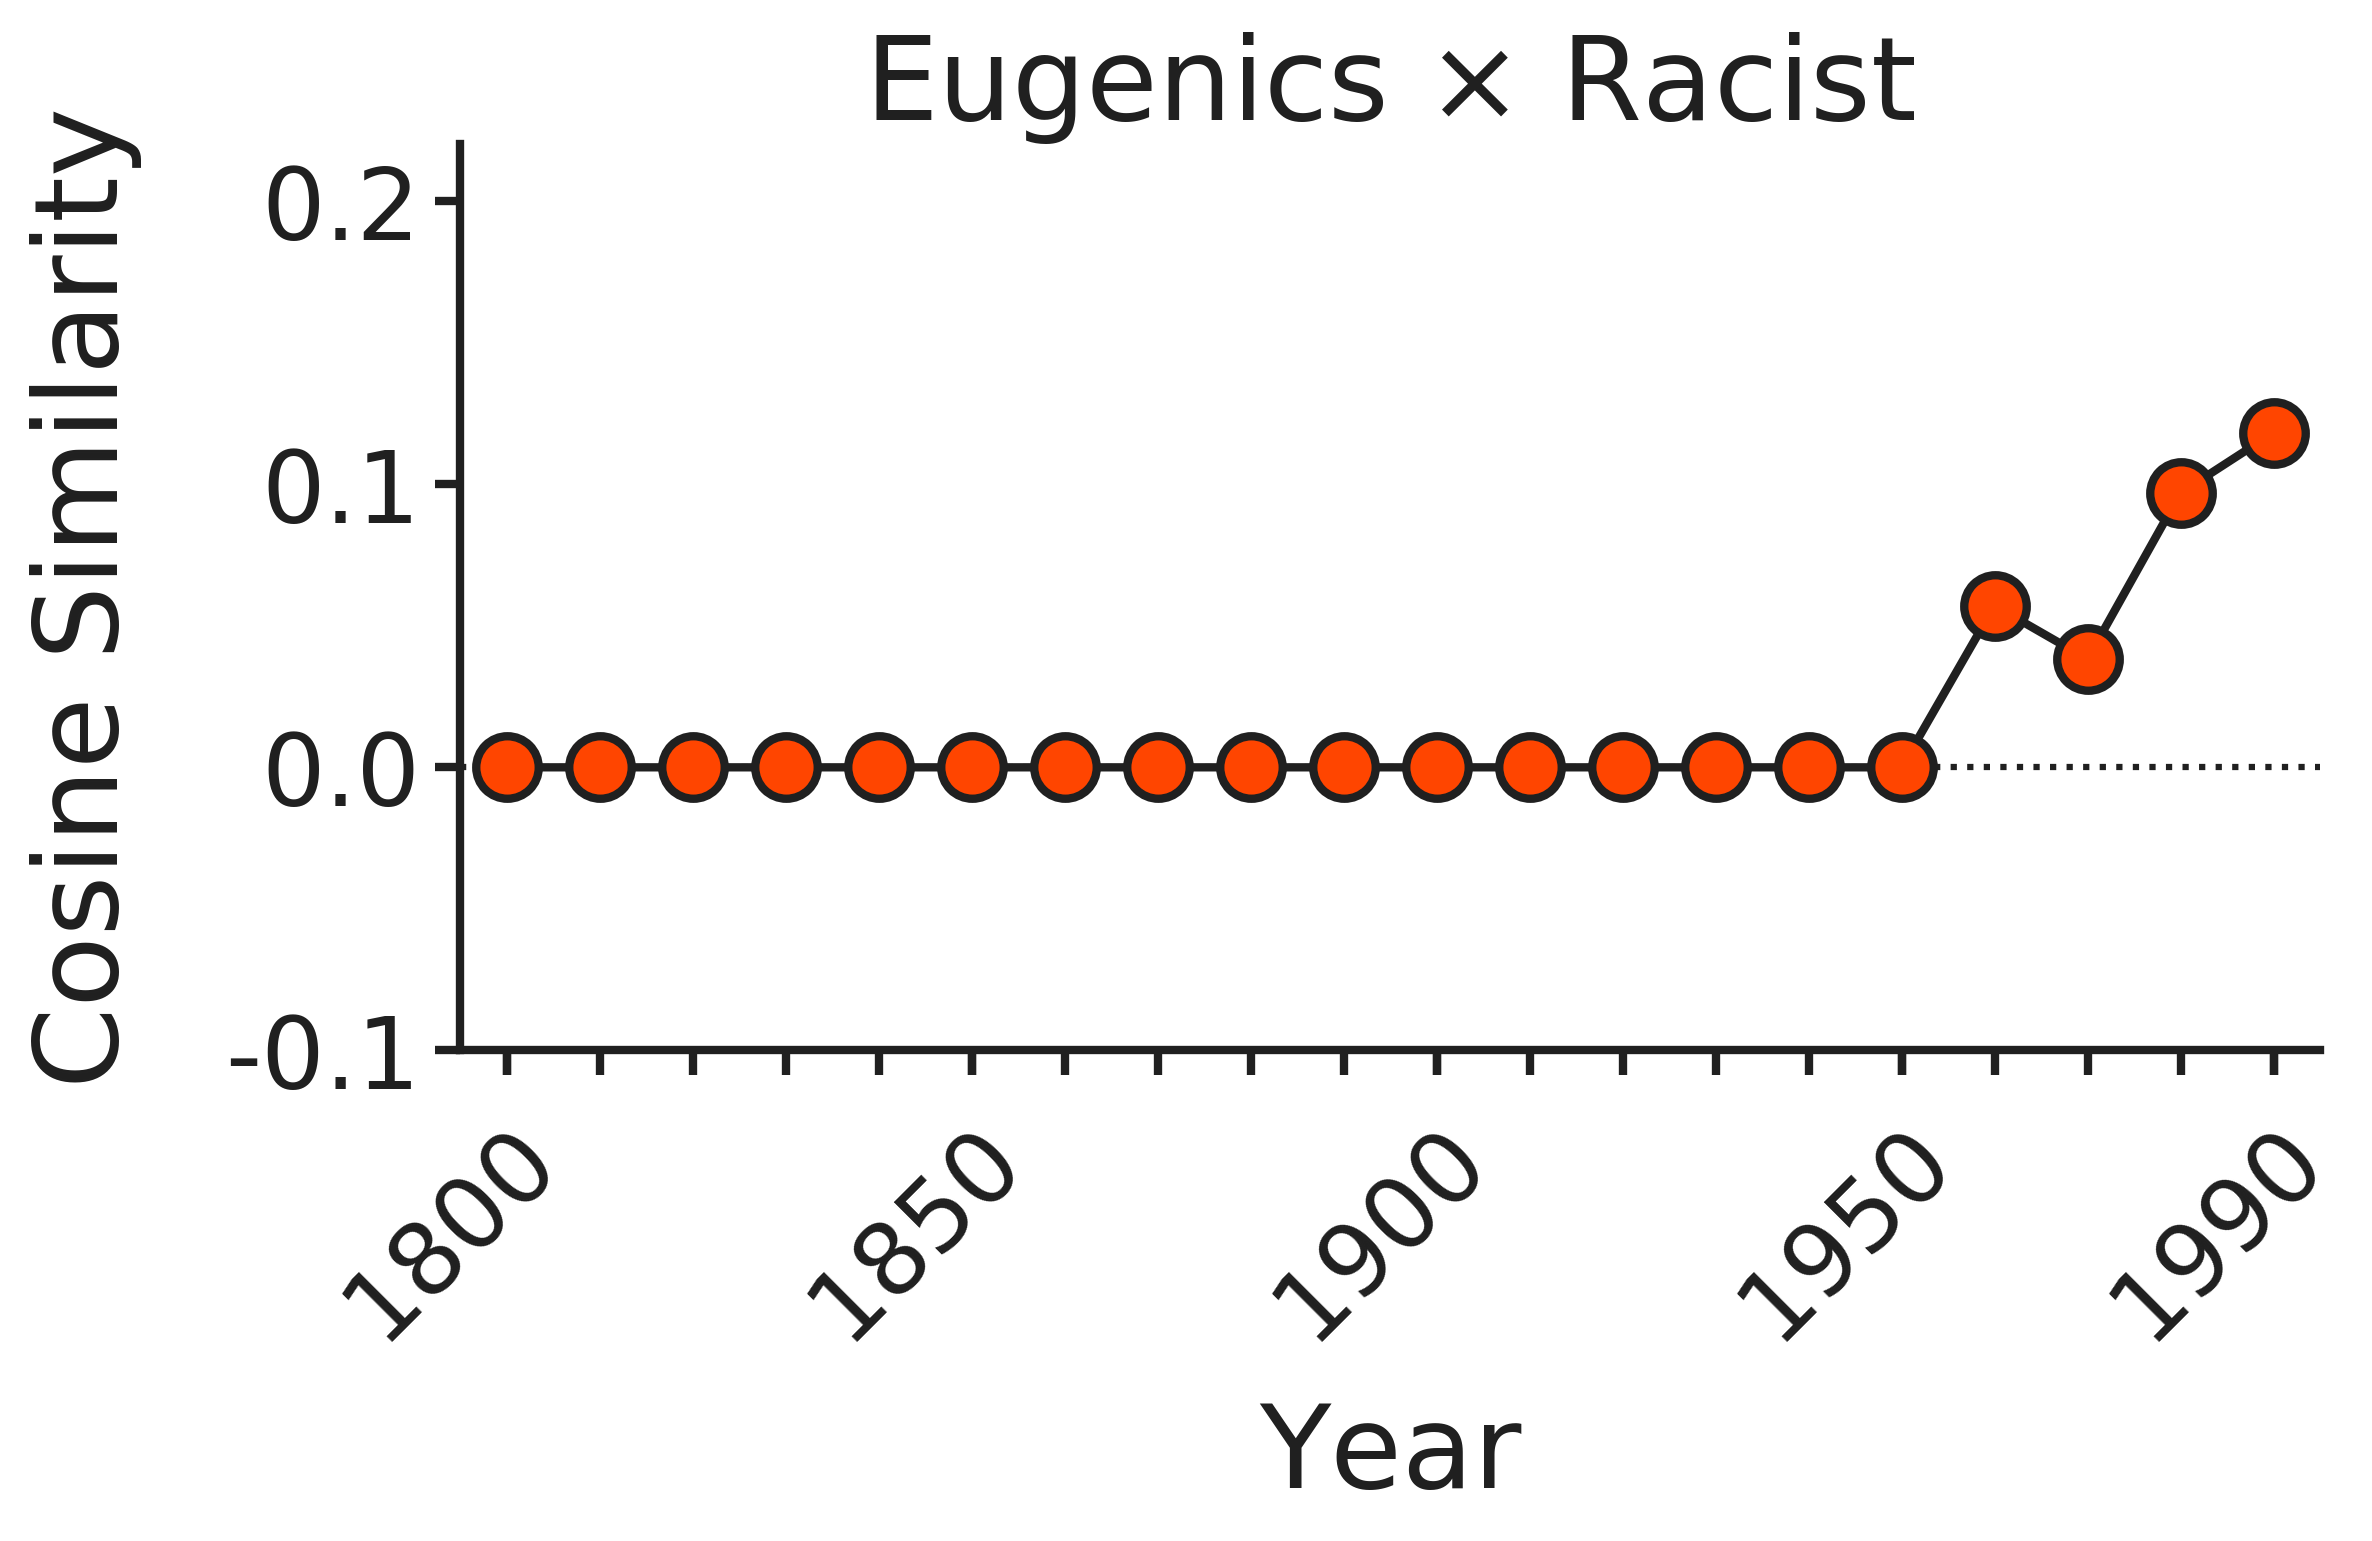

In [152]:
plotDiachronicSimilarity('eugenics','racist',embeddings_all,'orangered')

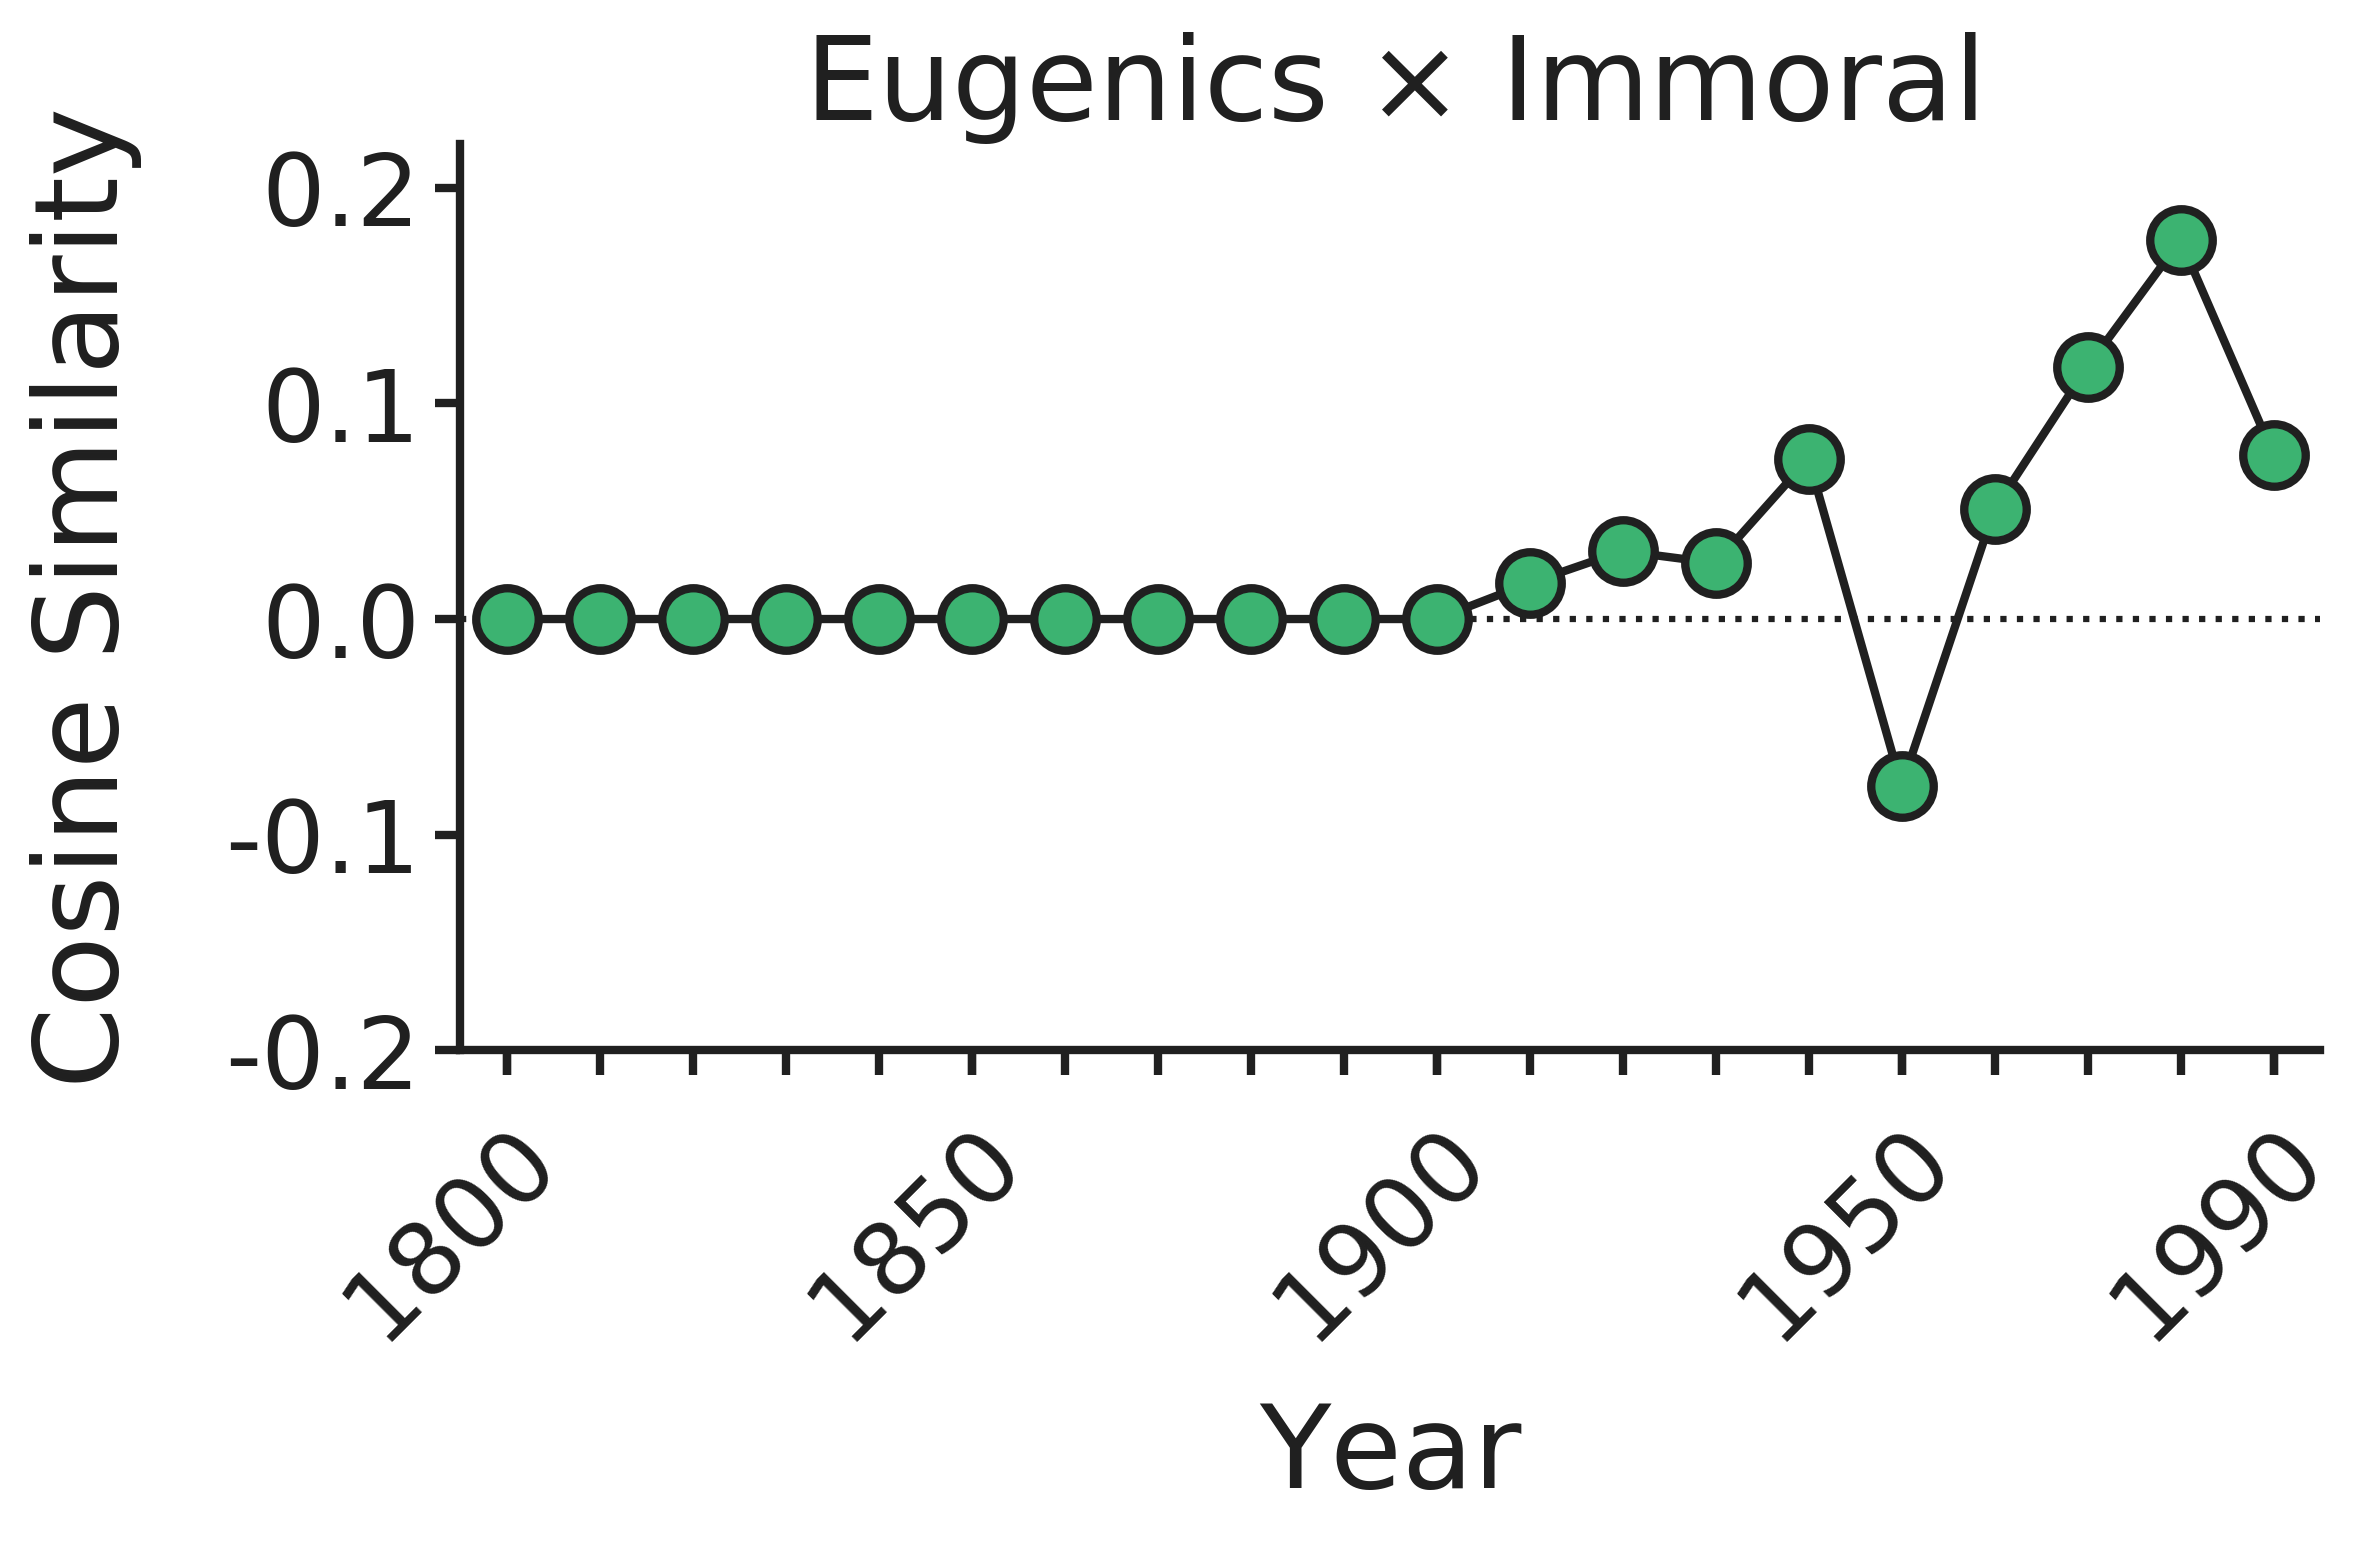

In [153]:
plotDiachronicSimilarity('eugenics','immoral',embeddings_all,'mediumseagreen')

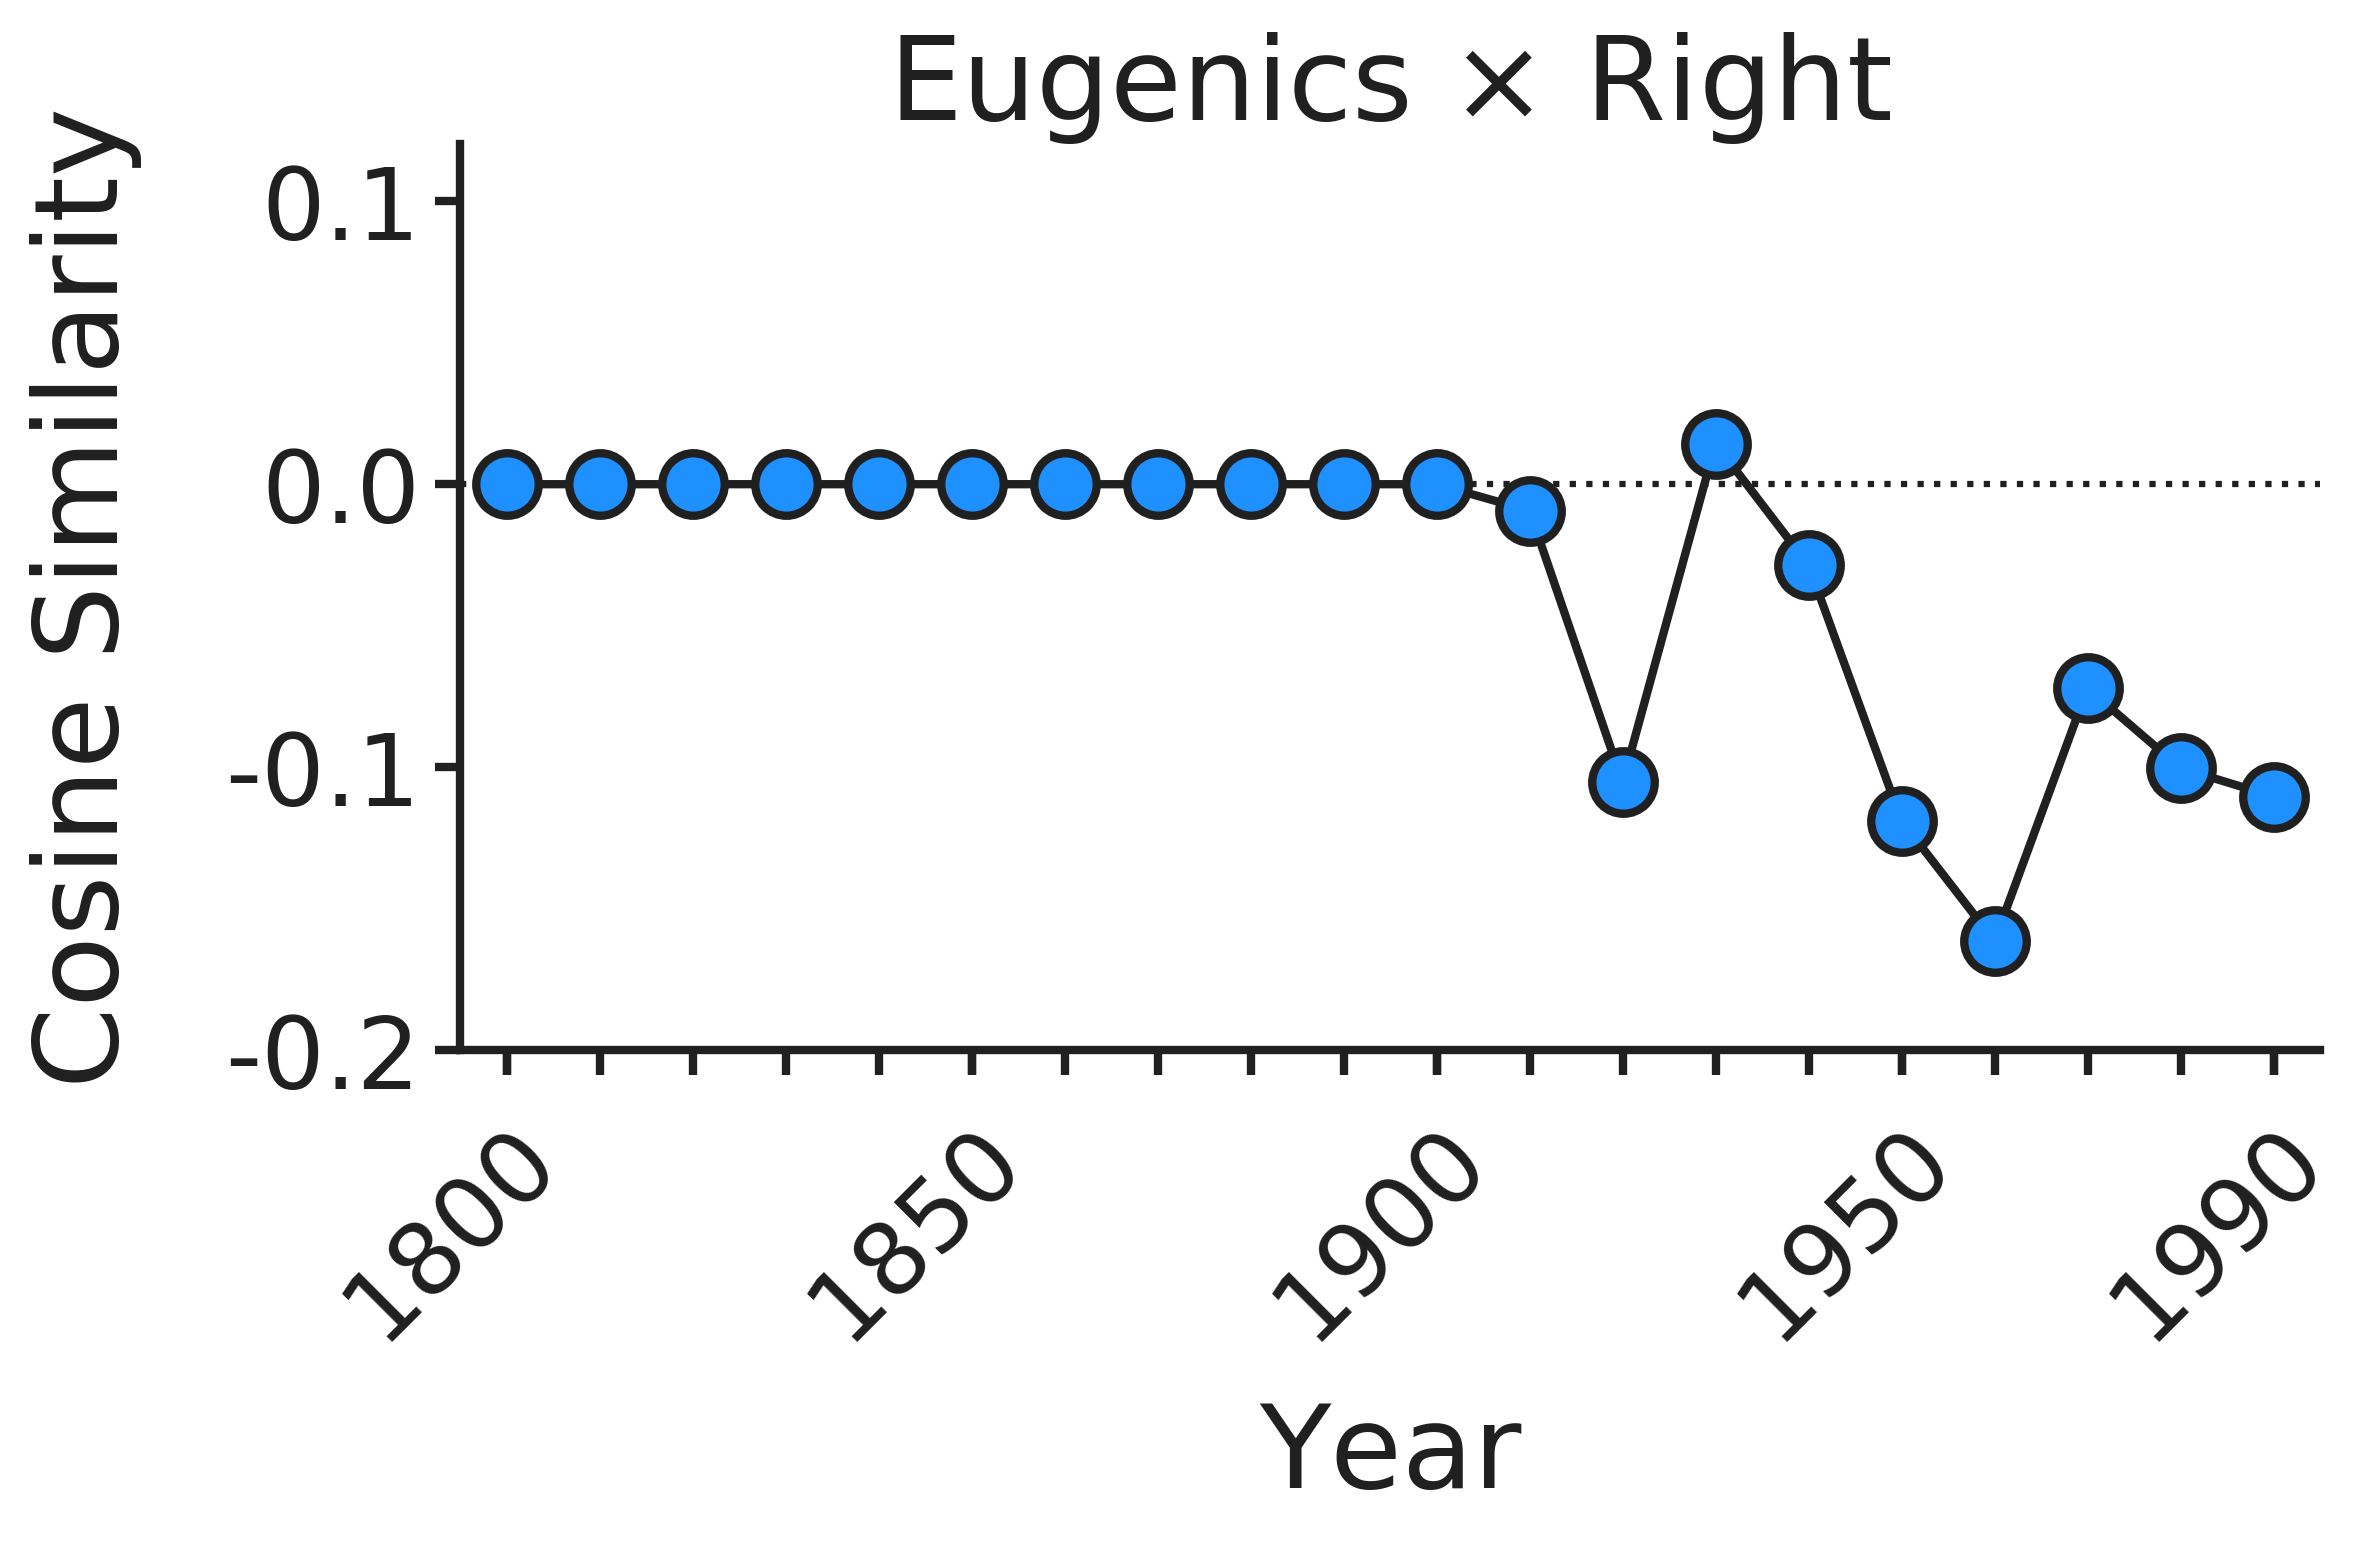

In [151]:
plotDiachronicSimilarity('eugenics','right',embeddings_all,'dodgerblue')

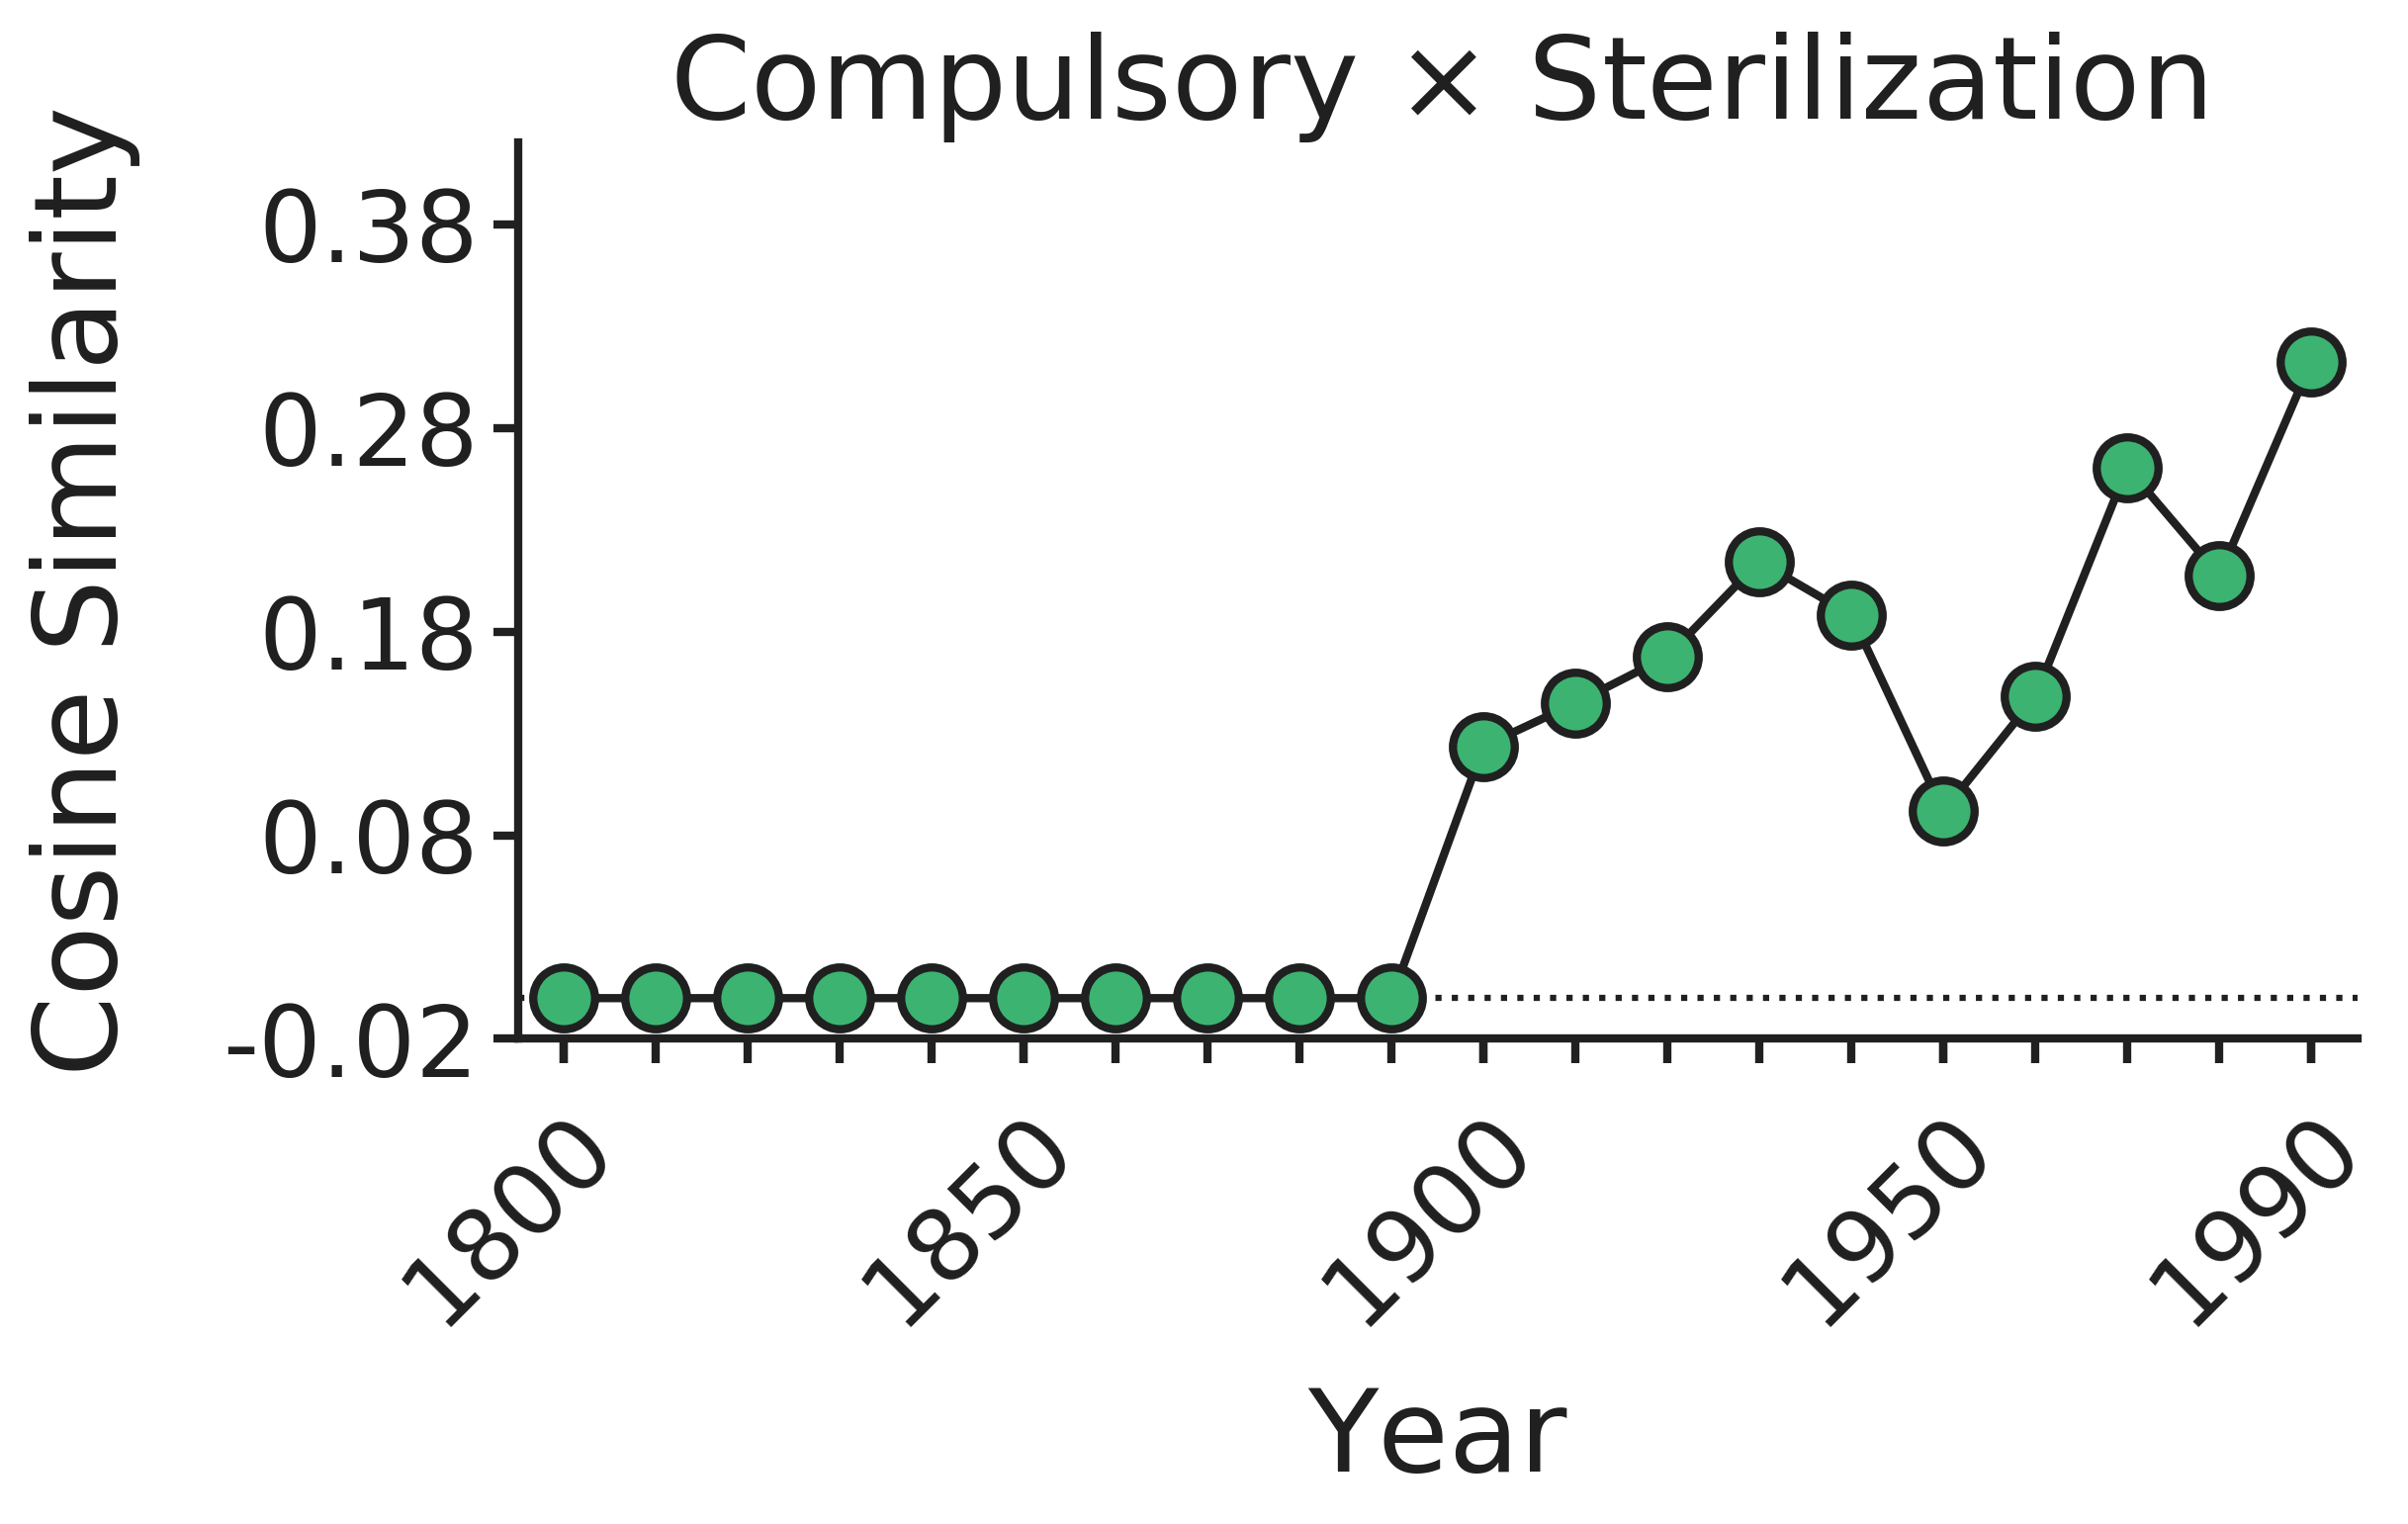

In [121]:
plotDiachronicSimilarity('compulsory','sterilization',embeddings_all,'mediumseagreen')

In [94]:
def plotDiachronicSimilarity(word1,word2,embeddings):
    time_sims = embeddings.get_time_sims(word1, word2) 


    fig, ax = plt.subplots(figsize=(8,4))

    a = list(time_sims.keys())
    b = list(time_sims.values())

    plt.plot(a, b, mfc='orangered', mec='0.125',marker='o', ms=15, ls='-', color='0.125', lw=2,mew=2)
    #plt.scatter(a, b,c='b',s=500,alpha=.99)
    thicc = 2
    ax.set_ylabel("Cosine Similarity",fontsize=28,labelpad = 20)
    ax.set_xlabel("Year",fontsize=28,labelpad = 10)
    ax.set_xticks([1800,1850,1900,1950,1990])
    ax.set_xticklabels([1800,1850,1900,1950,1990],rotation=45,rotation_mode='anchor',ha='right')
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax.xaxis.set_minor_locator(MultipleLocator(10))  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(bottom=True, left=True)
    ax.set_xlim((1795,1995))
    y_min = floor(min(time_sims.values()*10))/10
    y_max = ceil(max(time_sims.values())*10)/10 + 0.01
    ax.set_ylim((y_min,y_max))
    ax.set_yticks(map(lambda x: x/100.0, range(int(y_min*100),int(y_max*100),10)))

    ax.xaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.yaxis.set_tick_params(width=thicc,length=thicc*3)
    ax.xaxis.set_tick_params(width=thicc,which='minor',length=thicc*3)
    plt.axhline(0,zorder=1,color="0.125",linestyle='dotted')
    plt.yticks(fontsize=24)

    plt.xticks(fontsize=24)

    #plt.yticks()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(thicc)
    plt.title(str(word1).title() + " and " + str(word2).title(),fontsize=28)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)  
    return plt.show()

plotDiachronicSimilarity('eugenics','black',embeddings_all)

NameError: name 'embeddings_all' is not defined

In [1]:
plotDiachronicSimilarity('scientific','racism',embeddings_all)

NameError: name 'plotDiachronicSimilarity' is not defined

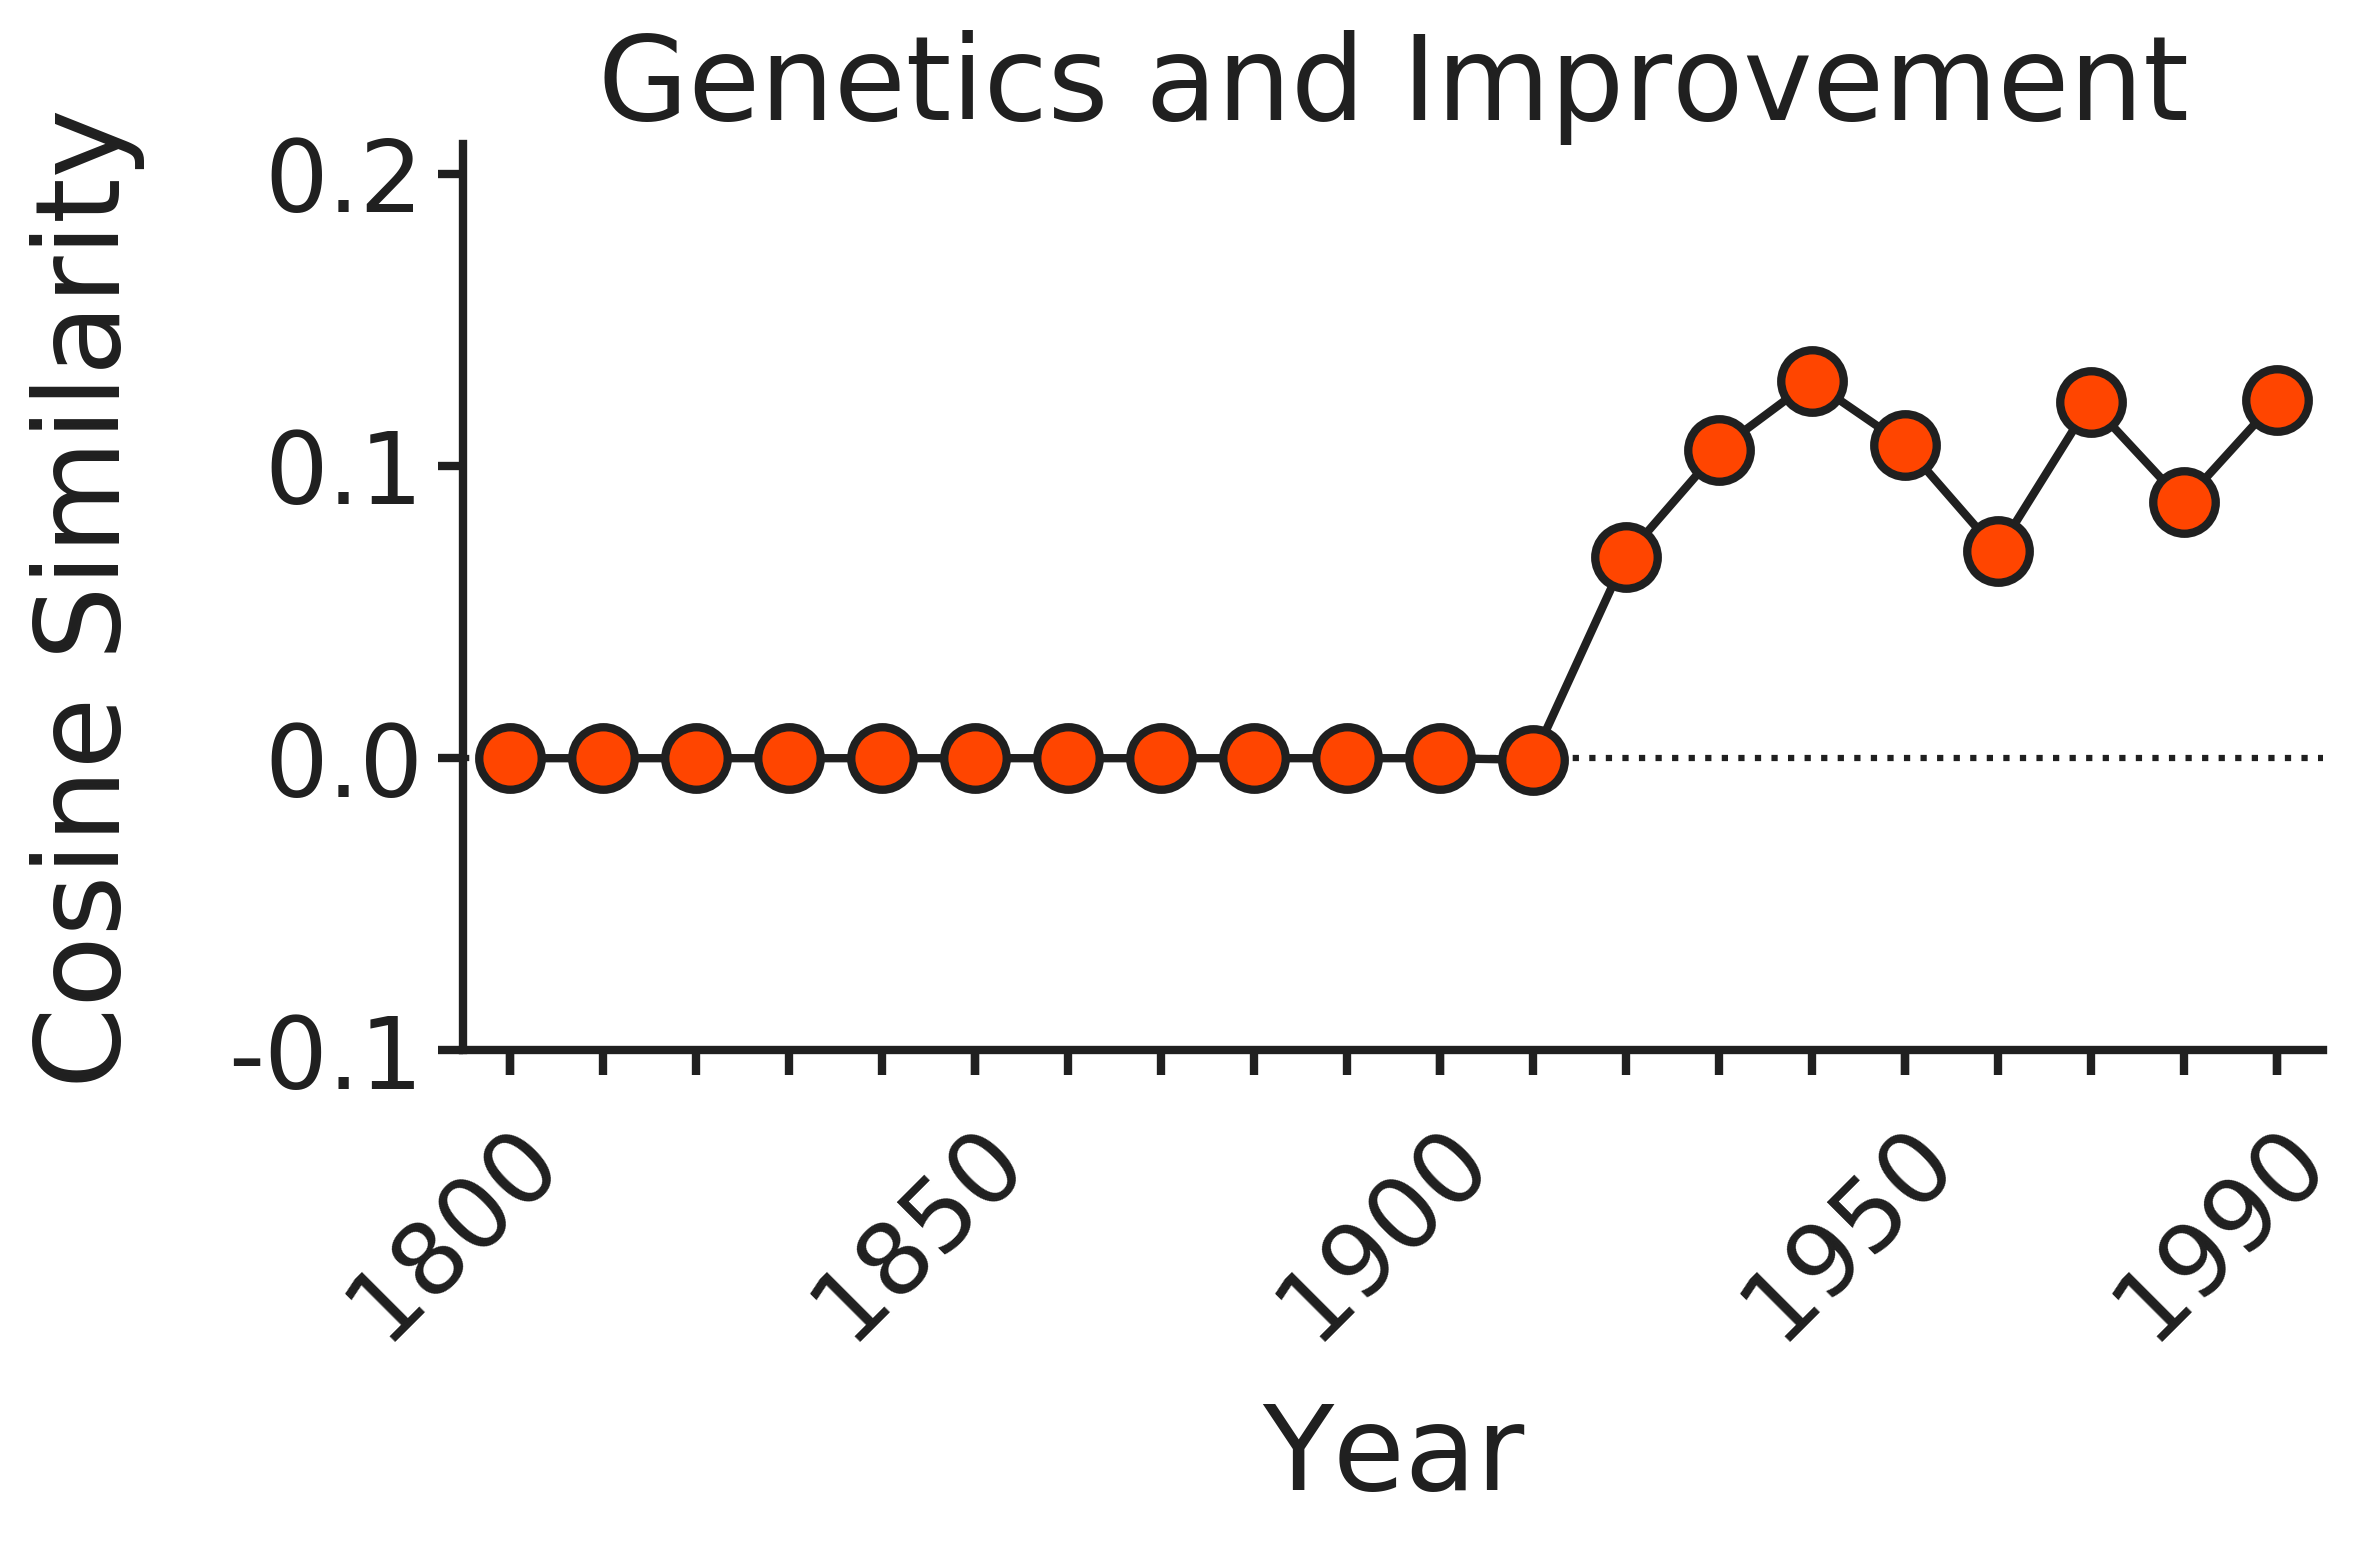

In [7]:
plotDiachronicSimilarity('genetics','improvement',embeddings_coha)

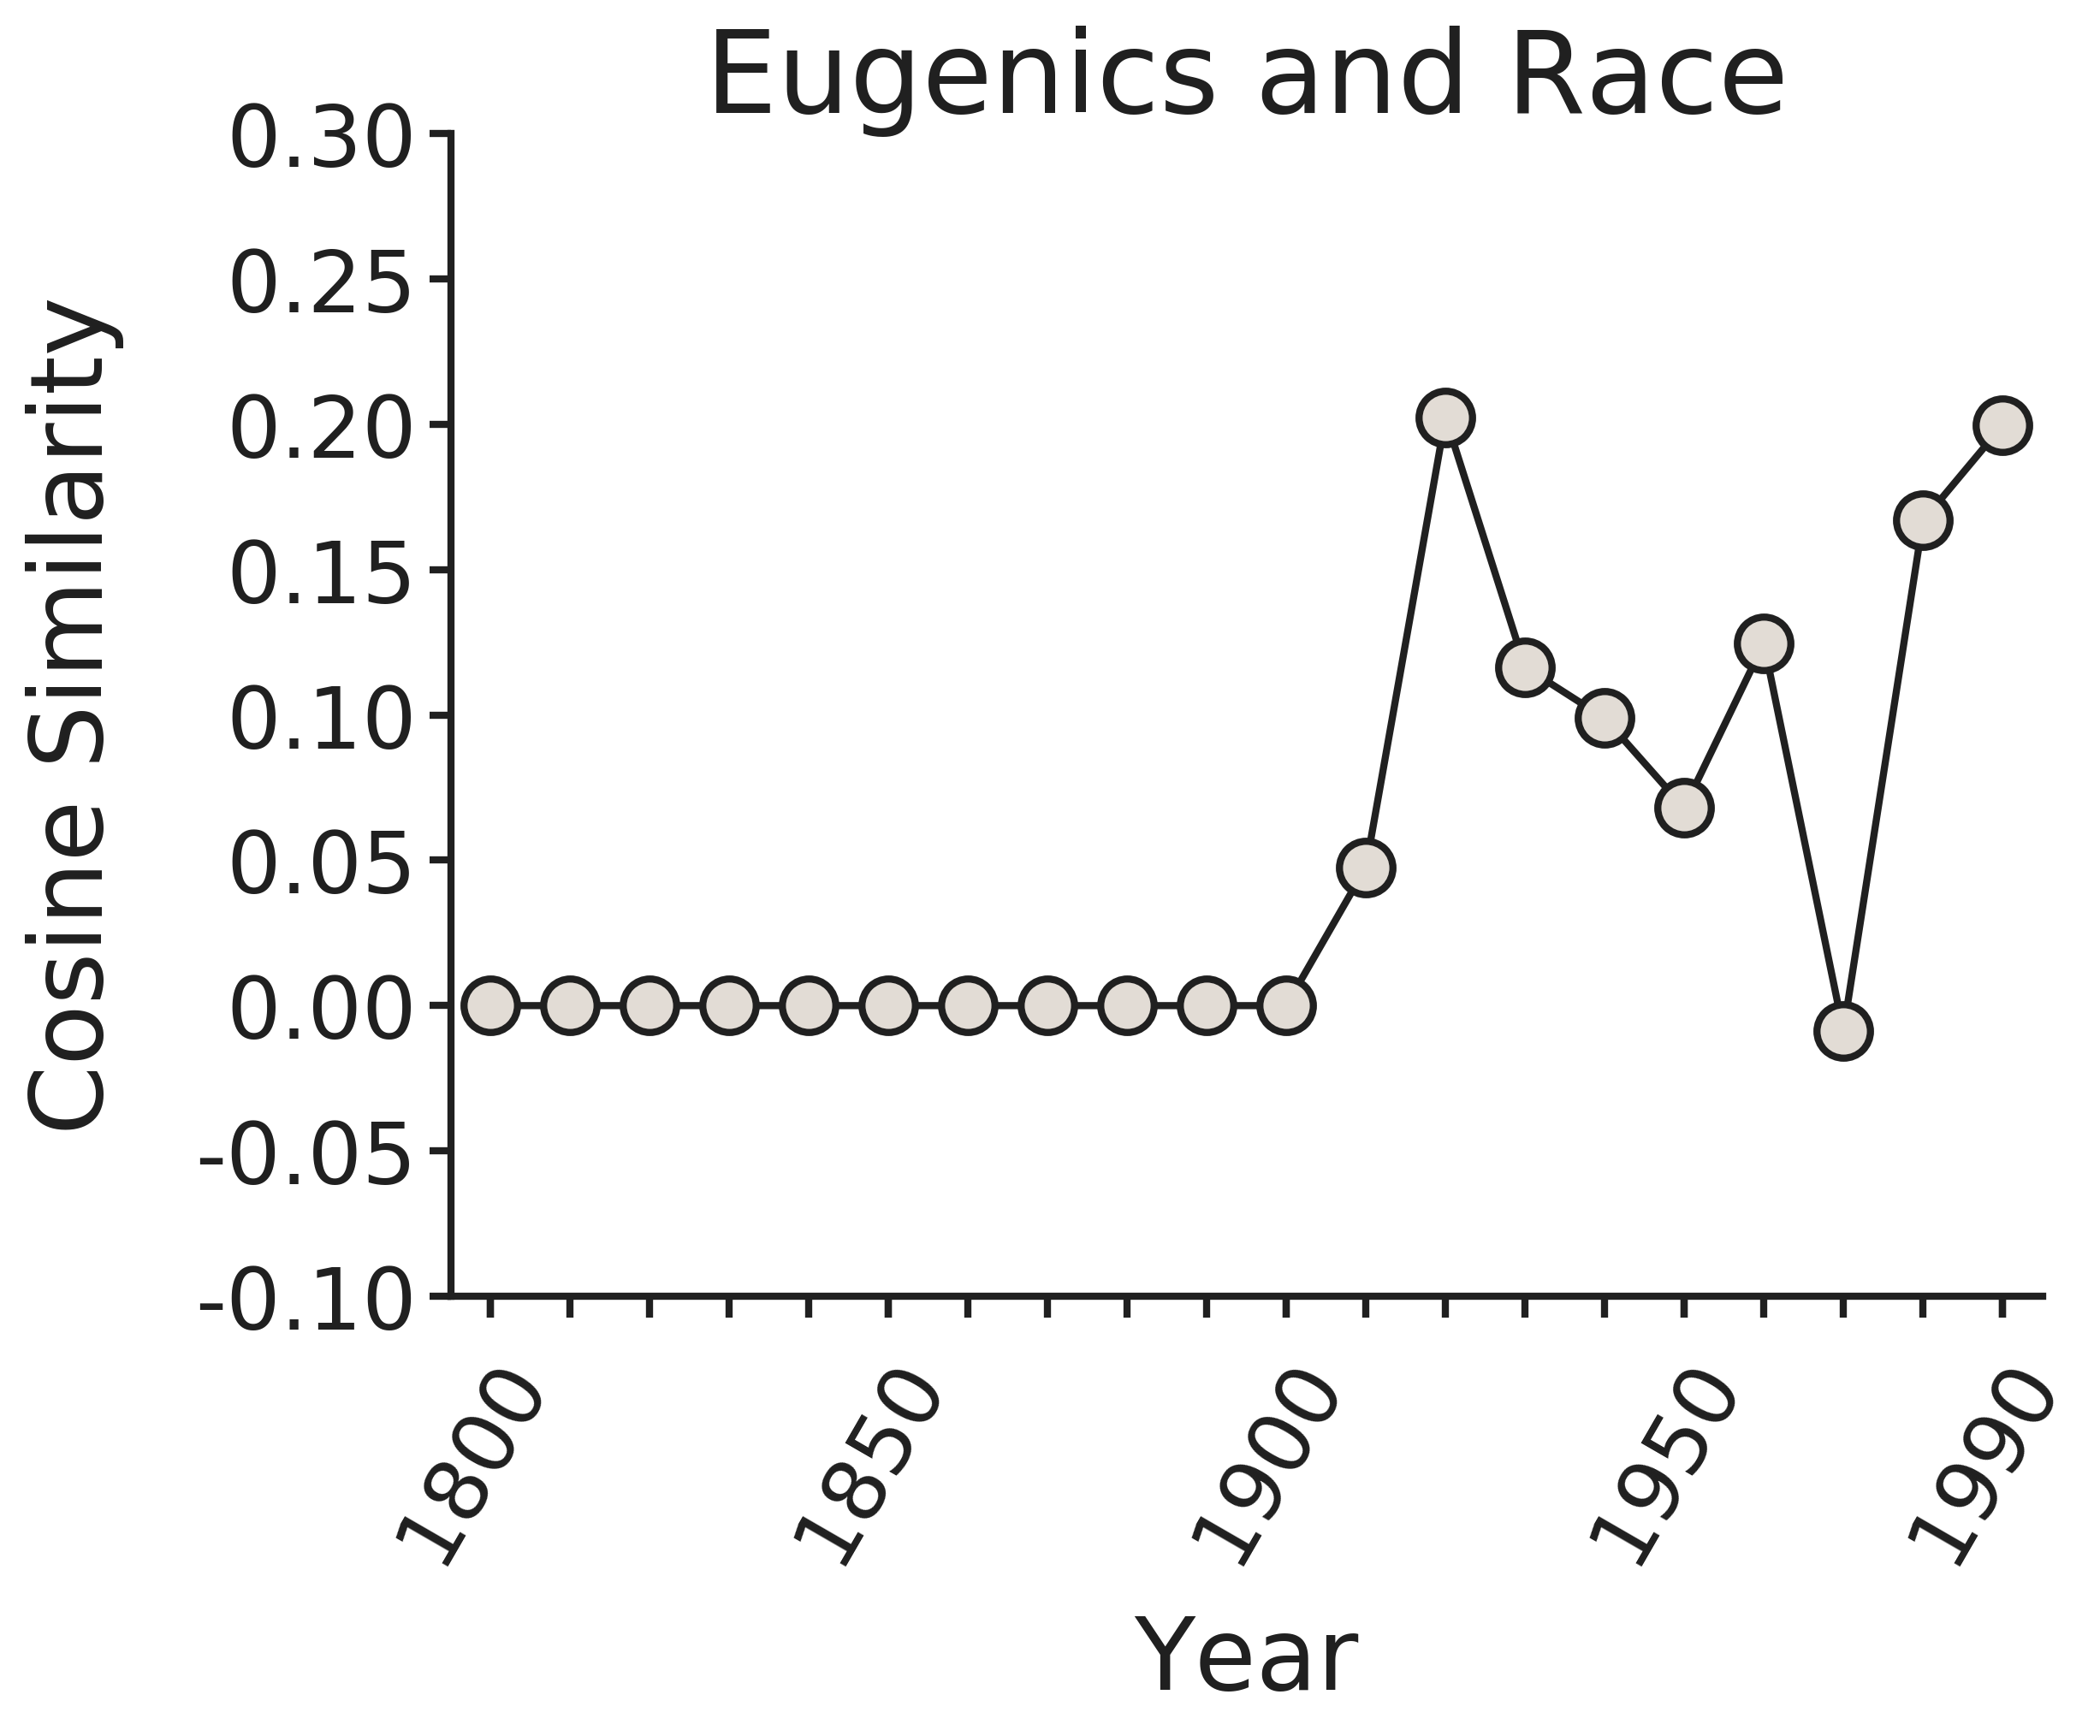

B Visualization algorithm
To visualize semantic change for a word w in two dimensions we employed the following procedure, which relies on the t-SNE embedding method (Van der Maaten and Hinton, 2008) as a subrou- tine:
1. Find the union of the word w ’s k nearest i
neighbors over all necessary time-points.
2. Compute the t-SNE embedding of these words on the most recent (i.e., the modern) time-point.
3. For each of the previous time-points, hold
all embeddings fixed, except for the target
word’s (i.e., the embedding for w ), and optimize a new t-SNE embedding only for the target word. We found that initializing the embedding for the target word to be the cen- troid of its k′-nearest neighbors in a time- point was highly effective.
Thus, in this procedure the background words are always shown in their “modern” positions, which makes sense given that these are the current mean- ings of these words. This approximation is neces- sary, since in reality all words are moving.
